# IMPORTING LIBRARIES

### General Libraries


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")



### Preprocessing Libraries


In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

### Machine Learning Libraries


In [3]:
import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [4]:
#This command configures pandas to display all columns and rows in the DataFrame without truncation
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Step1: Data Understanding and Preprocessing

## Load and Inspect the Dataset

In [5]:
df = pd.read_csv("C:/Users/Omkar/Downloads/Bankruptcy.csv")    #loading file into df

In [6]:
df.head()     #display top 5 rows

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [7]:
df.tail()     #inspecting bottom 5 rows

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,0.175045,0.175045,0.175045,0.216602,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.380155,0.010451,0.005457,0.631415,0.006655,0.124618,0.875382,0.005150,0.373823,0.005366,0.098222,0.171111,0.404804,0.103448,0.000690,0.009177,4.030000e+07,0.000143,0.027903,0.006348,0.392596,0.006312,0.817769,0.312840,0.578455,0.099481,0.005469,0.005072,0.103838,0.346224,0.277543,0.013212,0.786888,0.736716,0.330914,1.792237e-03,0.925611,0.002266,0.019060,0.000229,0.000124,0.593985,1.077940e-04,0.671570,0.400338,0.786888,0.330914,0.112622,0.639806,0.458639,0.587178,0.314063,0.027951,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,0.181324,0.181324,0.181324,0.216697,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09,0.000445,0.264730,0.377389,0.009259,0.006741,0.631489,0.004623,0.099253,0.900747,0.006772,0.372505,0.008619,0.098572,0.171805,0.399926,0.103448,0.000655,0.009652,9.940000e+0

In [8]:
df.info()     #to check datatype and null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
#The dataset is composed of a combination of 6819 rows per each of our 96 columns.
#All of the columns are numerical (int64 or float64)
#There are no missing values (Nan) among the data

In [9]:
# Computing the descriptive statistics of our numrerical feature
df.describe()   

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [ ]:
#observations
#we can see that there are 3 percent companies which are bankcrupt

### Data cleaning

In [10]:
#counting null values
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [11]:
#To counting duplicate values
df.duplicated().sum()

0

In [12]:
#checking companies which financially stable and unstable 
print(df['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Financially unstable: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


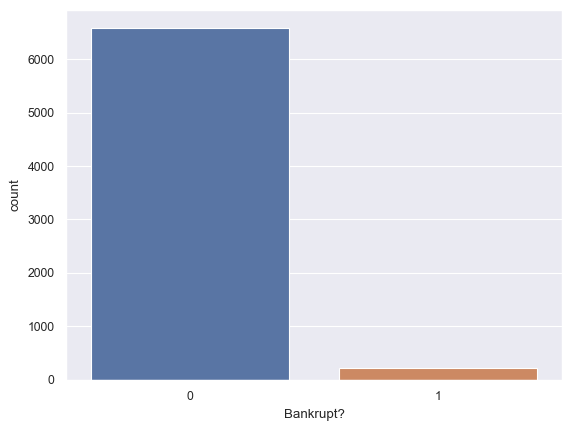

In [38]:
# Checking labels distributions
sns.countplot(x = 'Bankrupt?', data = df)
plt.show()

In [ ]:
#Looking at the plot above we can clearly see how our labels are strongly unbalanced, 
#and this is a the main obstacle that we need to solve to obtain good performances.

# Step 2: EDA & VISUALIZATIONS


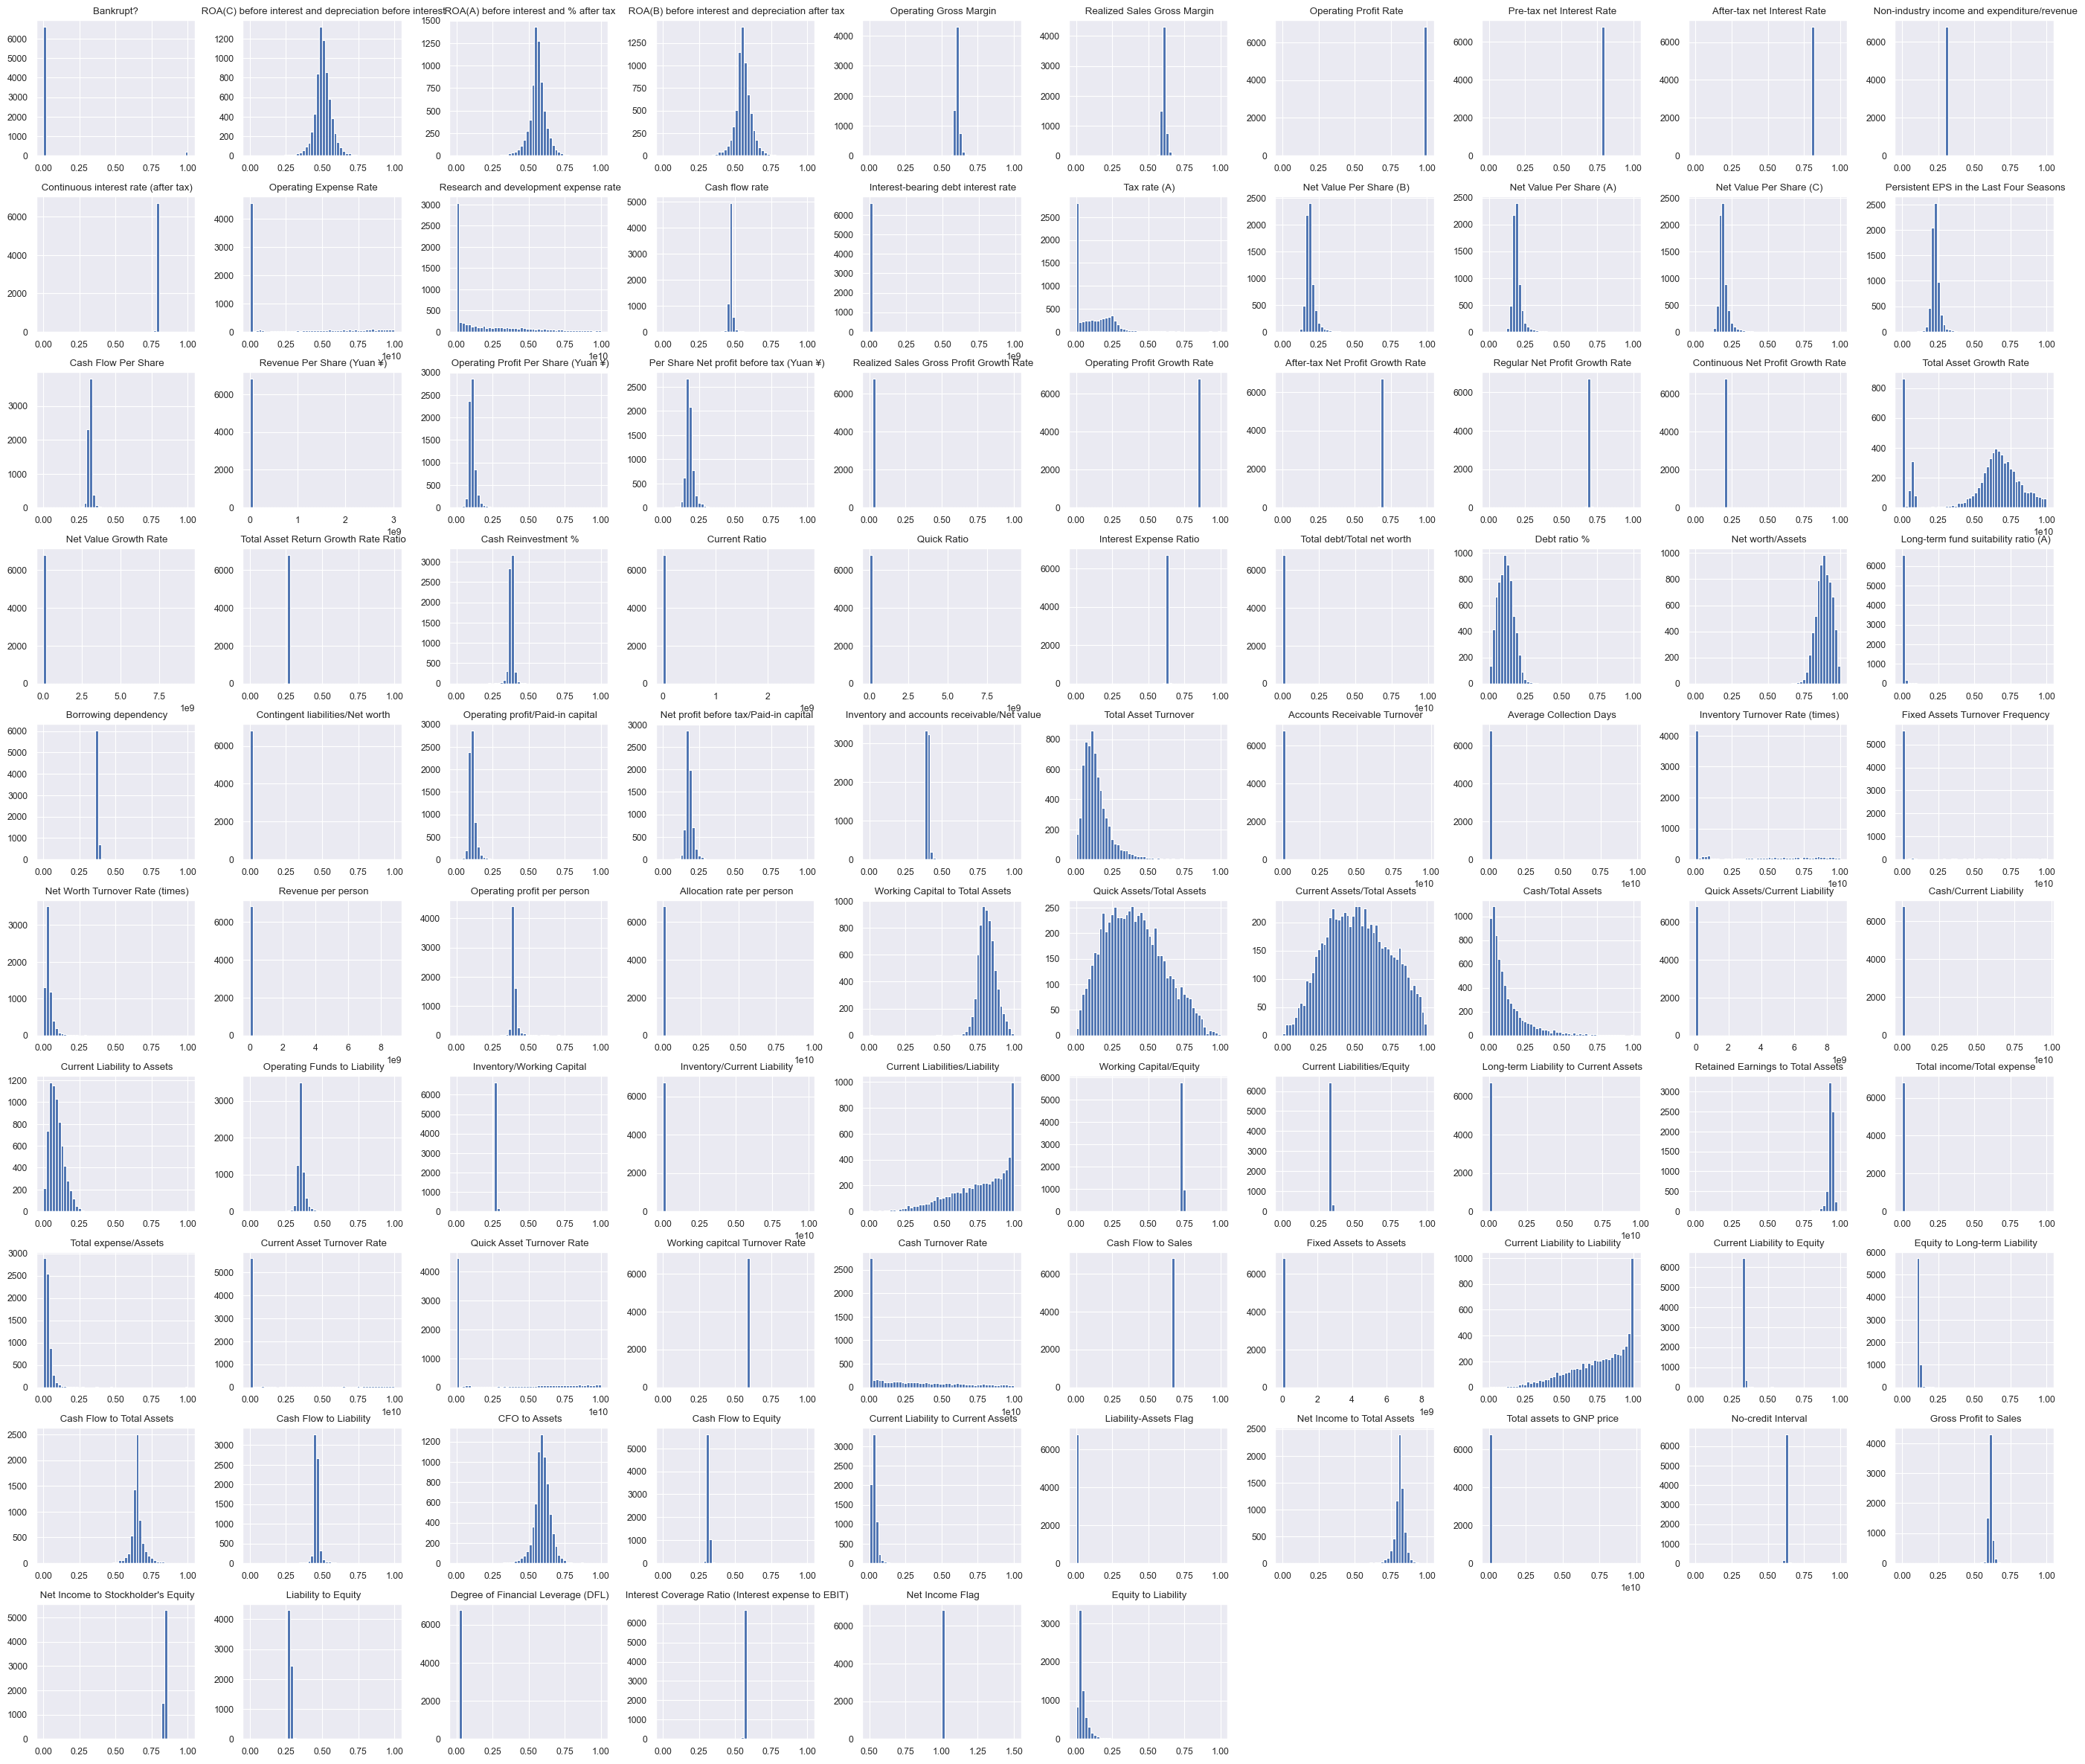

In [14]:
#creating histograms for all numeric columns in the DataFrame
df.hist(figsize = (35,30), bins = 50)
plt.show()

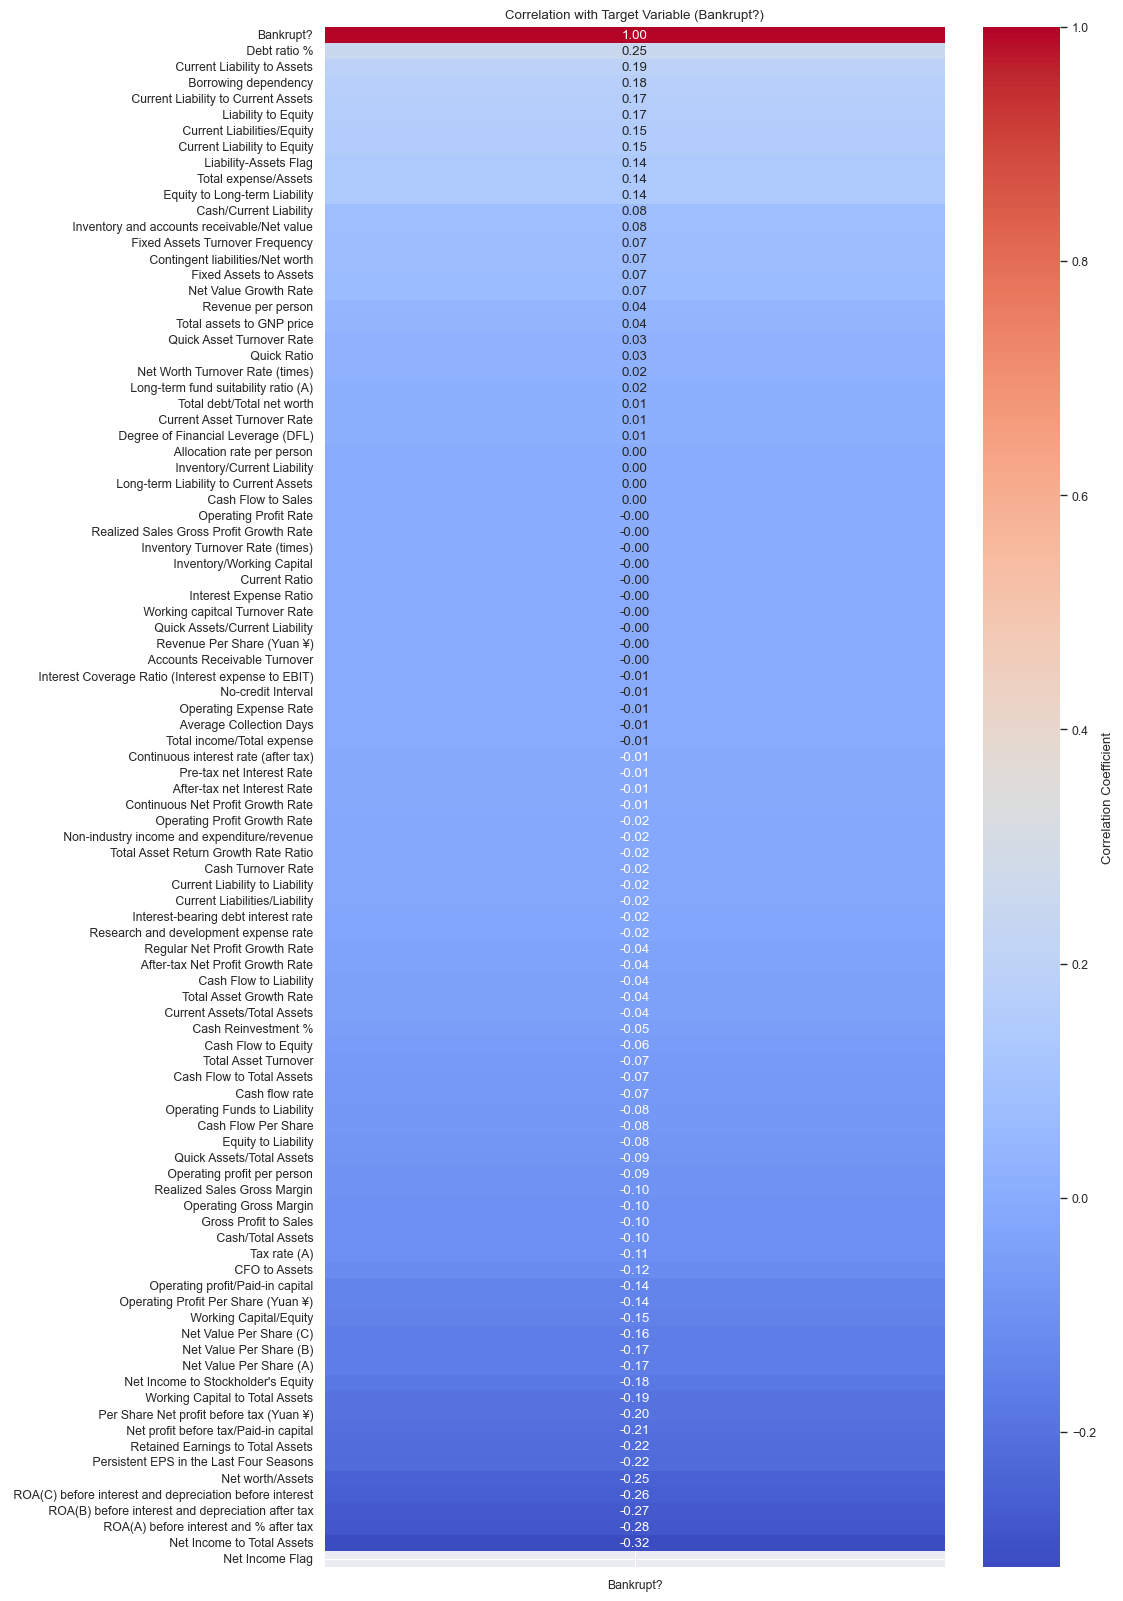

In [50]:
# Extract the correlation of each feature with the target variable
mat = df.corr()
target_correlation = mat['Bankrupt?'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 20))
sns.heatmap(target_correlation.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation with Target Variable (Bankrupt?)')
plt.show()

In [51]:
target_correlation = mat['Bankrupt?']
(target_correlation).sort_values(ascending=False) #printing correlation of each column with target column 'Bankrupt? '

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
 Liability to Equity                                        0.166812
 Current Liabilities/Equity                                 0.153828
 Current Liability to Equity                                0.153828
 Liability-Assets Flag                                      0.139212
 Total expense/Assets                                       0.139049
 Equity to Long-term Liability                              0.139014
 Cash/Current Liability                                     0.077921
 Inventory and accounts receivable/Net value                0.075278
 Fixed Assets Turnover Frequency                            0.072818
 Contingent liabilities/Net worth 

### observations:
##### 1. Debt ratio% has highest positive correlation coefficient with bankrupt column
##### that means as debt ratio increases , the chances of getting bankrupt also increases 

##### 2.Net income to Total assets has highest negative correlation coefficient with bankrupt column
##### that means as Net income to Total assets decreases , the chances of getting bankrupt also increases


#### Handling outliers


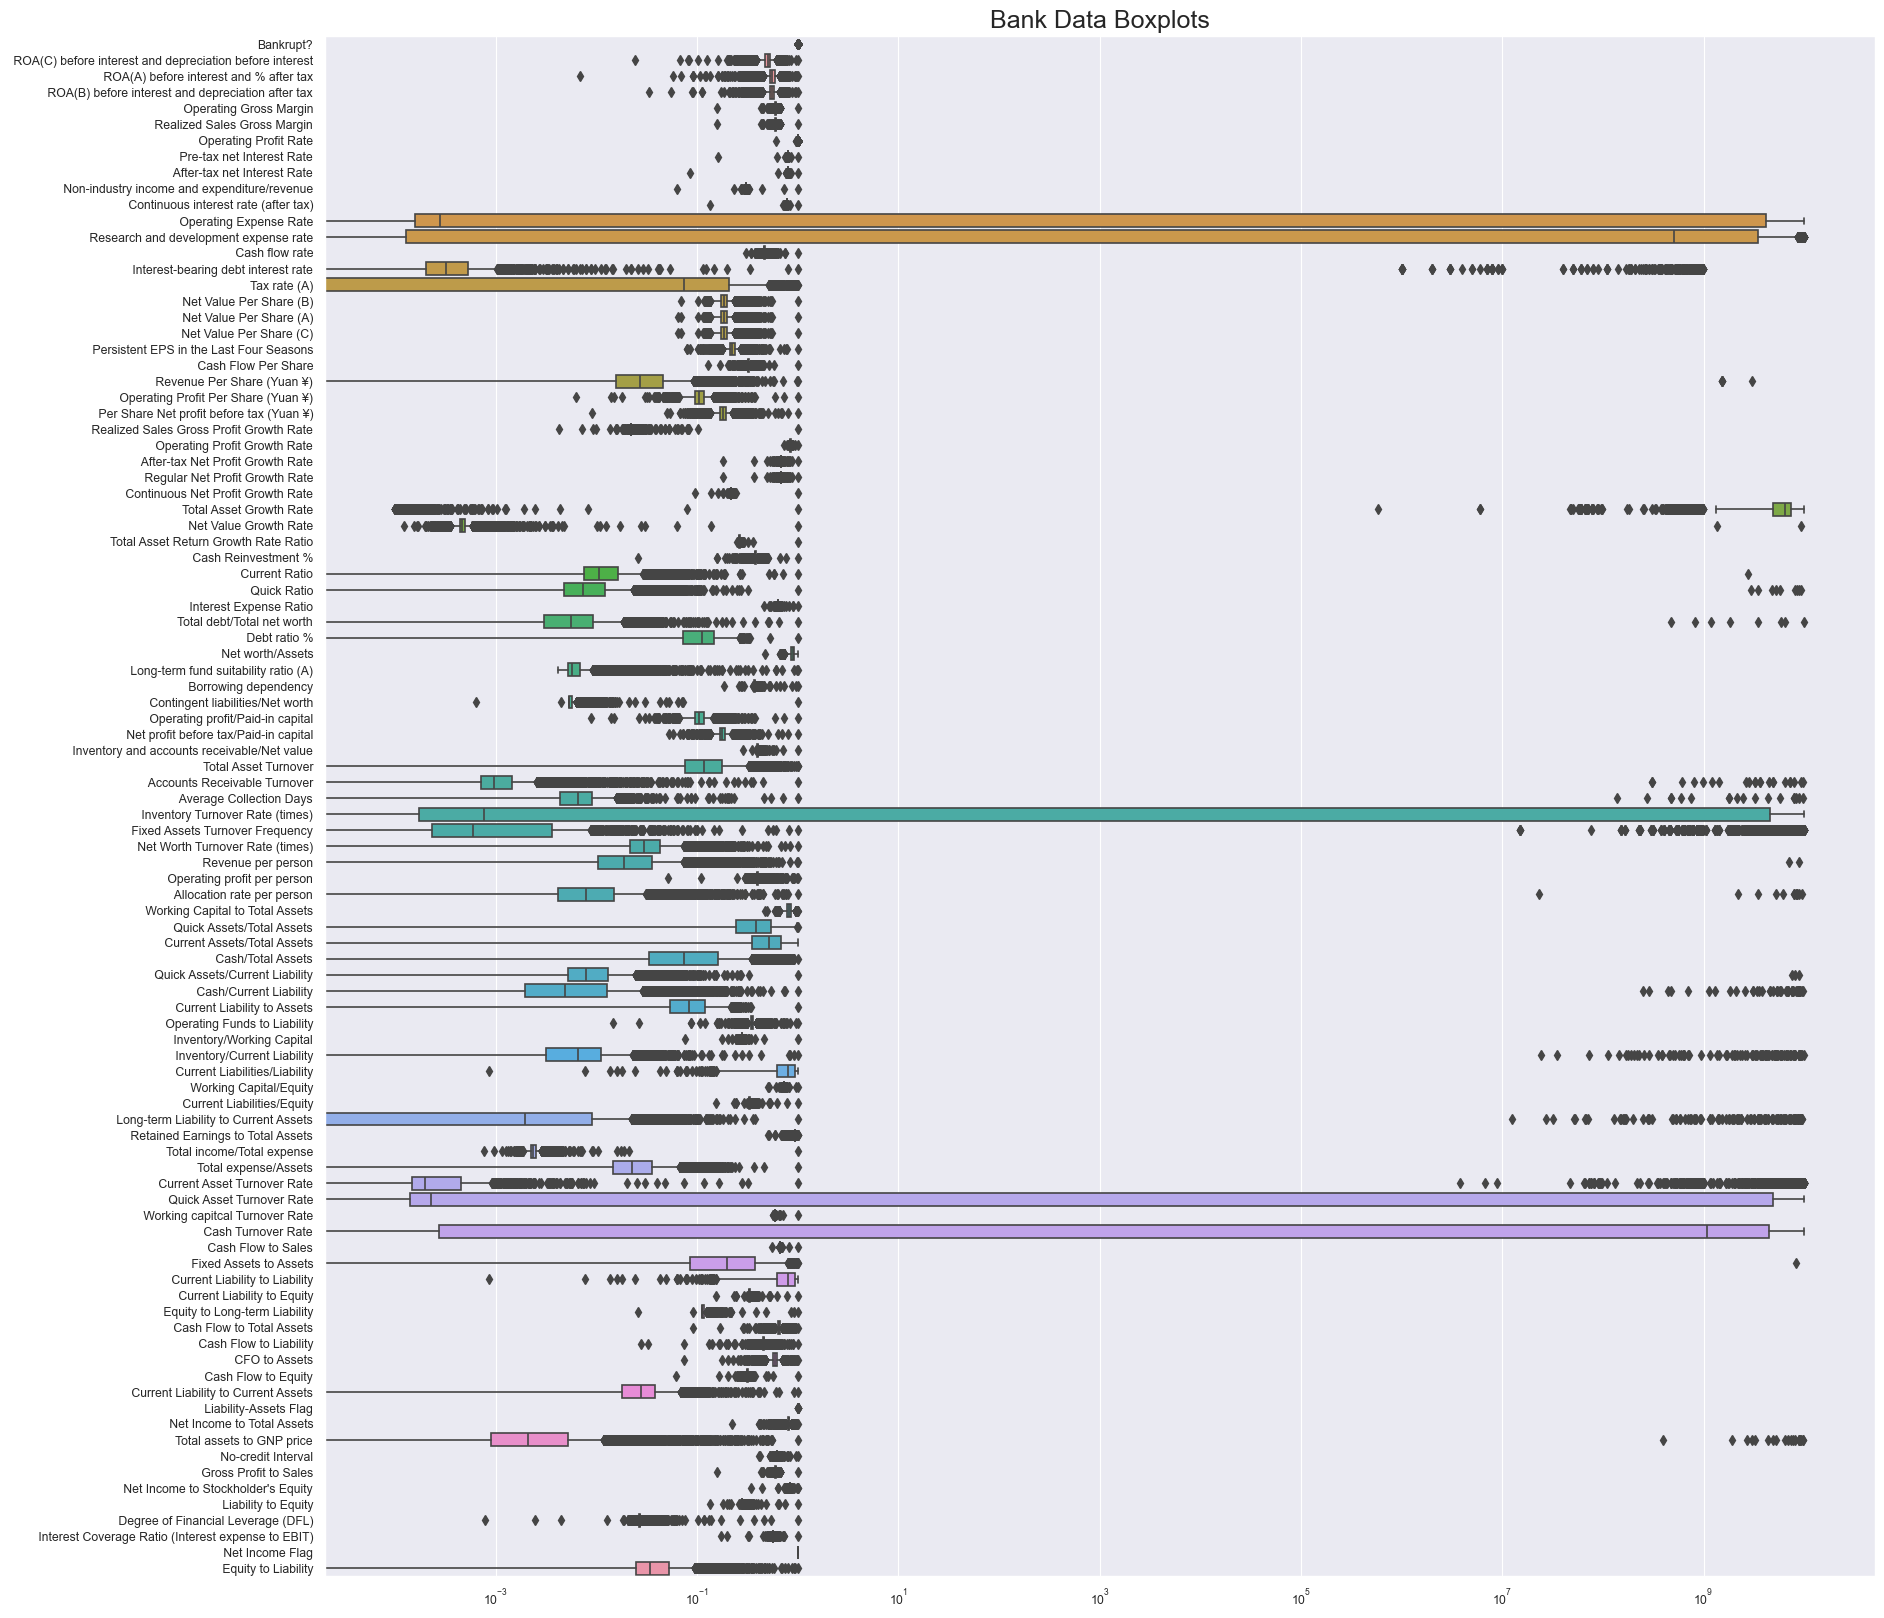

In [16]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")    #Creates a horizontal boxplot for all numeric columns in the DataFrame df
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

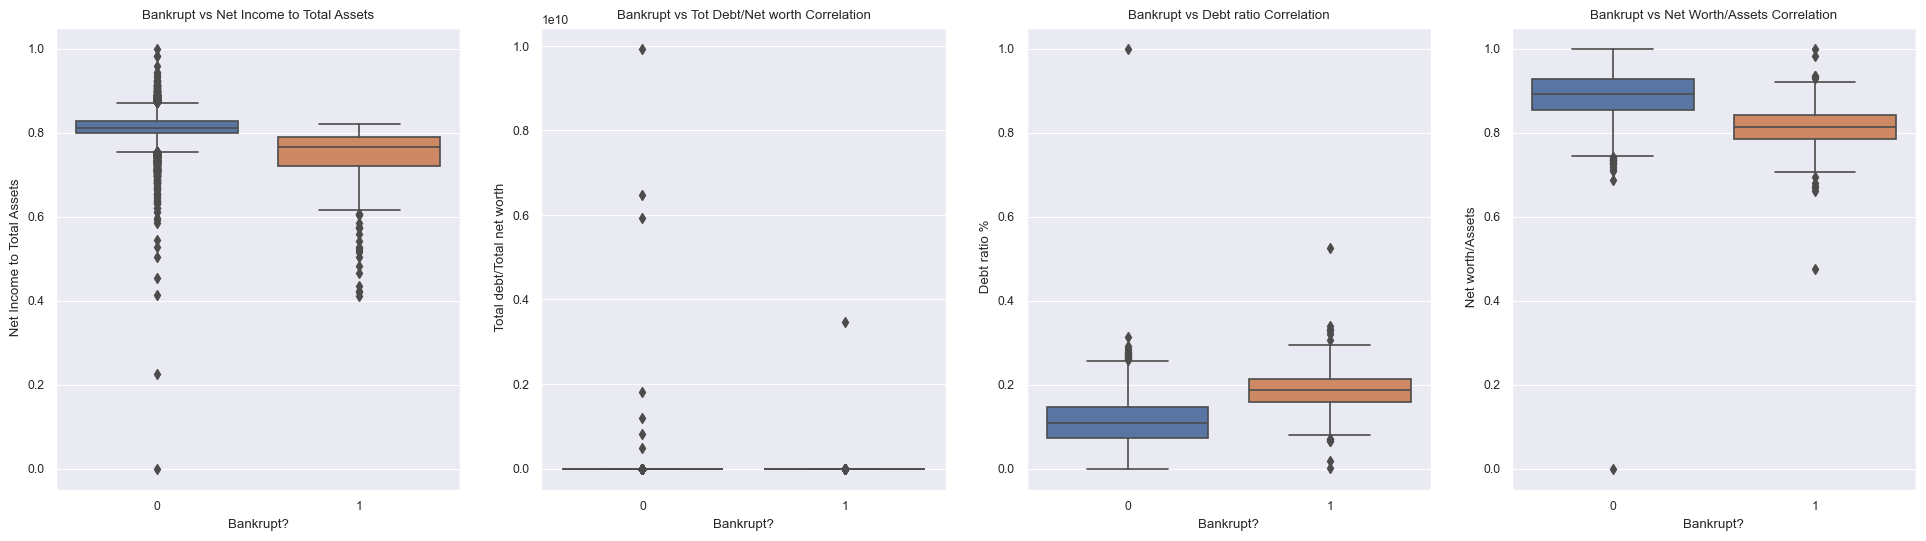

In [17]:
# Plotting interesting features
#Creates a boxplot for each specified column against the 'Bankrupt?' column and assigns it to the corresponding subplot.
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=df, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=df, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

In [ ]:
# Net Income to Total Assets
#Non-Bankrupt Companies (0): The median Net Income to Total Assets ratio is around 0.8, with a relatively small interquartile range (IQR), 
#indicating less variation among non-bankrupt companies.
#Bankrupt Companies (1): The median ratio is also around 0.8, but the IQR is wider, 
#suggesting greater variability in this ratio among bankrupt companies.
#Outliers: There are several low outliers (close to 0) for both groups, but more pronounced for bankrupt companies.
# Total Debt to Total Net Worth
#Non-Bankrupt Companies (0): The majority of the data points are clustered around very low values (close to 0), 
#indicating lower debt levels relative to net worth.
#Bankrupt Companies (1): Similar distribution with a low median value, but there are more extreme outliers, 
#with some companies having very high debt relative to their net worth (approaching or exceeding 0.2).
#Outliers: There are a few significant outliers for bankrupt companies, indicating higher leverage which might contribute to financial distress.
# Debt Ratio %
#Non-Bankrupt Companies (0): The median debt ratio is below 0.1, indicating conservative leverage levels.
#Bankrupt Companies (1): The median debt ratio is higher (around 0.2), showing that bankrupt companies tend to have higher leverage.
#Outliers: Several outliers with very high debt ratios (above 0.4) are present for both groups, but more so for bankrupt companies.
# Net Worth to Assets
#Non-Bankrupt Companies (0): The median ratio is around 0.9, with a narrow IQR, 
#indicating that most non-bankrupt companies maintain a high proportion of net worth relative to their total assets.
#Bankrupt Companies (1): The median ratio is slightly lower (around 0.85), with a slightly wider IQR, 
#suggesting more variability in this ratio among bankrupt companies.
#Outliers: Several low outliers for both groups, with more pronounced low values for bankrupt companies, 
#indicating weaker balance sheet positions.

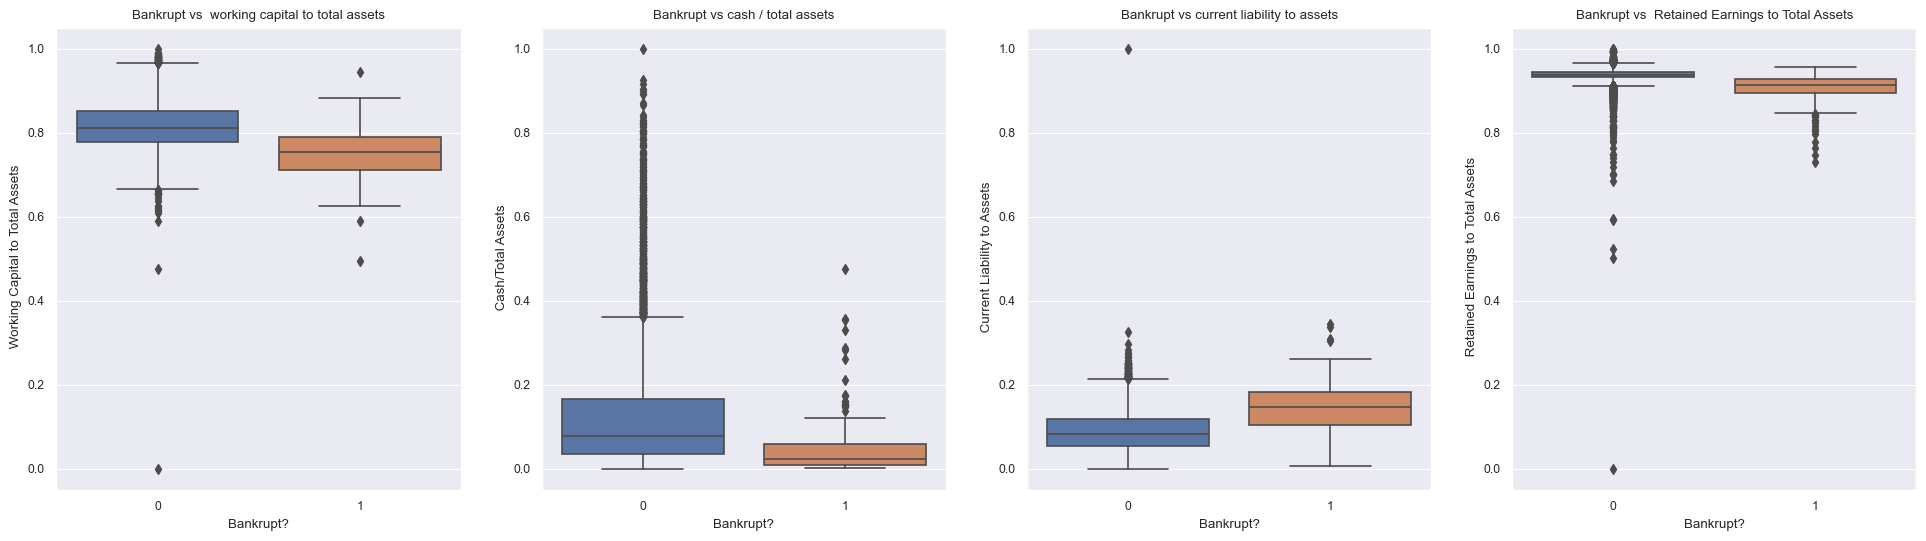

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

In [ ]:
# Working Capital to Total Assets
#Non-Bankrupt Companies (0): The median Working Capital to Total Assets ratio is around 0.8, with a narrow interquartile range (IQR), 
#indicating consistency among non-bankrupt companies.
#Bankrupt Companies (1): The median ratio is slightly lower (around 0.75), with a wider IQR, suggesting greater variability among bankrupt companies.
#Outliers: There are more low outliers (below 0.6) for bankrupt companies, indicating lower working capital relative to total assets, 
#which can be a sign of liquidity problems.
# Cash to Total Assets
#Non-Bankrupt Companies (0): The median Cash to Total Assets ratio is around 0.1, with a substantial number of outliers, 
#indicating variability in cash holdings among non-bankrupt companies.
#Bankrupt Companies (1): The median ratio is significantly lower (around 0.05), 
#with fewer high outliers, suggesting that bankrupt companies typically hold less cash relative to their total assets.
#Outliers: Numerous high outliers for non-bankrupt companies indicate some companies maintain very high cash reserves, 
#which can provide a buffer against financial distress.
# Current Liability to Assets
#Non-Bankrupt Companies (0): The median Current Liability to Assets ratio is around 0.15, with a relatively narrow IQR, 
#indicating lower short-term liabilities relative to total assets.
#Bankrupt Companies (1): The median ratio is higher (around 0.2), with a wider IQR, 
#showing that bankrupt companies tend to have higher short-term liabilities.
#Outliers: There are several high outliers for both groups, but more so for bankrupt companies, 
#indicating high short-term debt which can lead to liquidity issues.
#Retained Earnings to Total Assets
#Non-Bankrupt Companies (0): The median Retained Earnings to Total Assets ratio is around 0.85, 
#with a narrow IQR, indicating that non-bankrupt companies retain a significant portion of their earnings relative to total assets.
#Bankrupt Companies (1): The median ratio is slightly lower (around 0.8), with a wider IQR, 
#suggesting greater variability and lower retention of earnings among bankrupt companies.
#Outliers: There are more low outliers for bankrupt companies, indicating poor retention of earnings which can impact long-term financial stability.


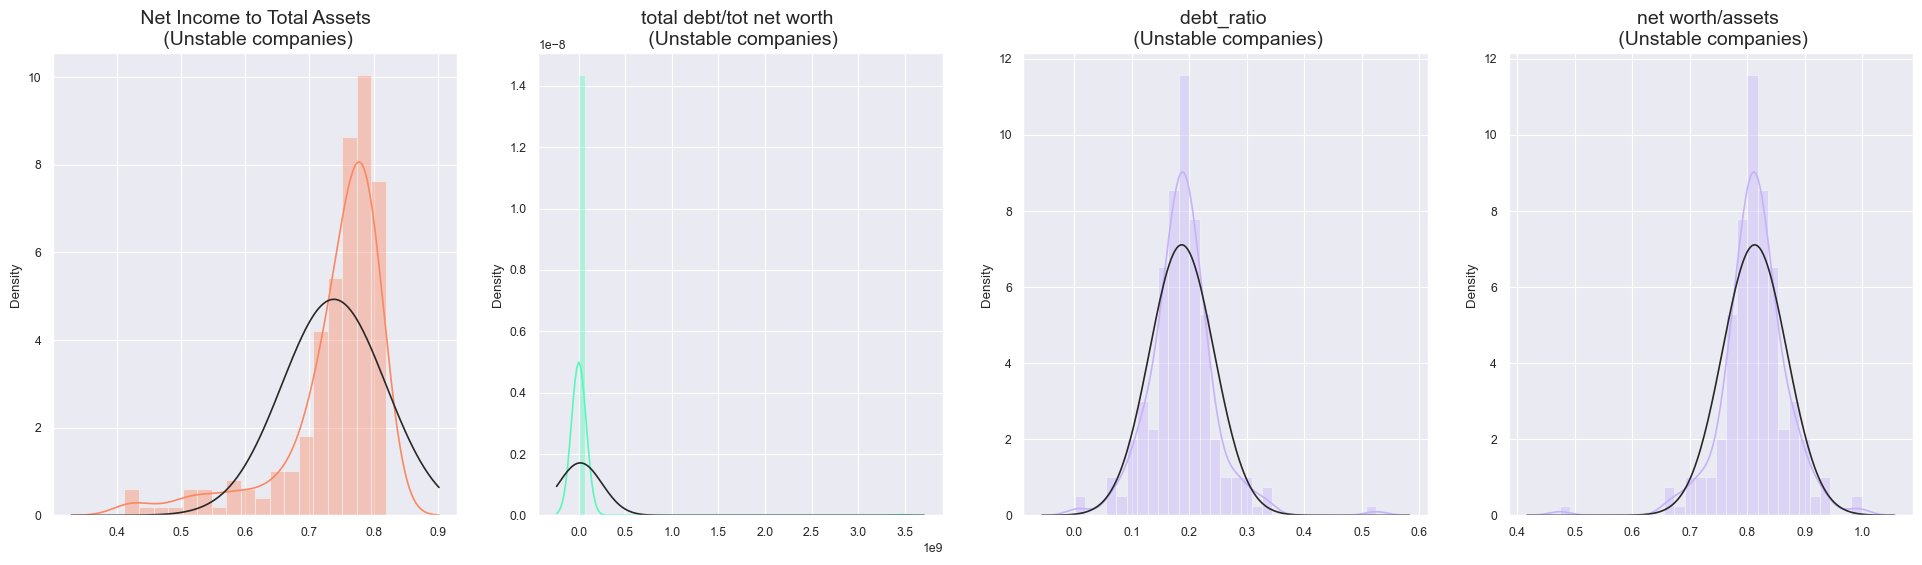

In [19]:
# Plotting the feature distributions for close to bankrputcy companies
#creating histograms for specific columns of the DataFrame where the companies are bankrupt ('Bankrupt?' == 1)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df[' Total debt/Total net worth'].loc[df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df[' Debt ratio %'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df[' Net worth/Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

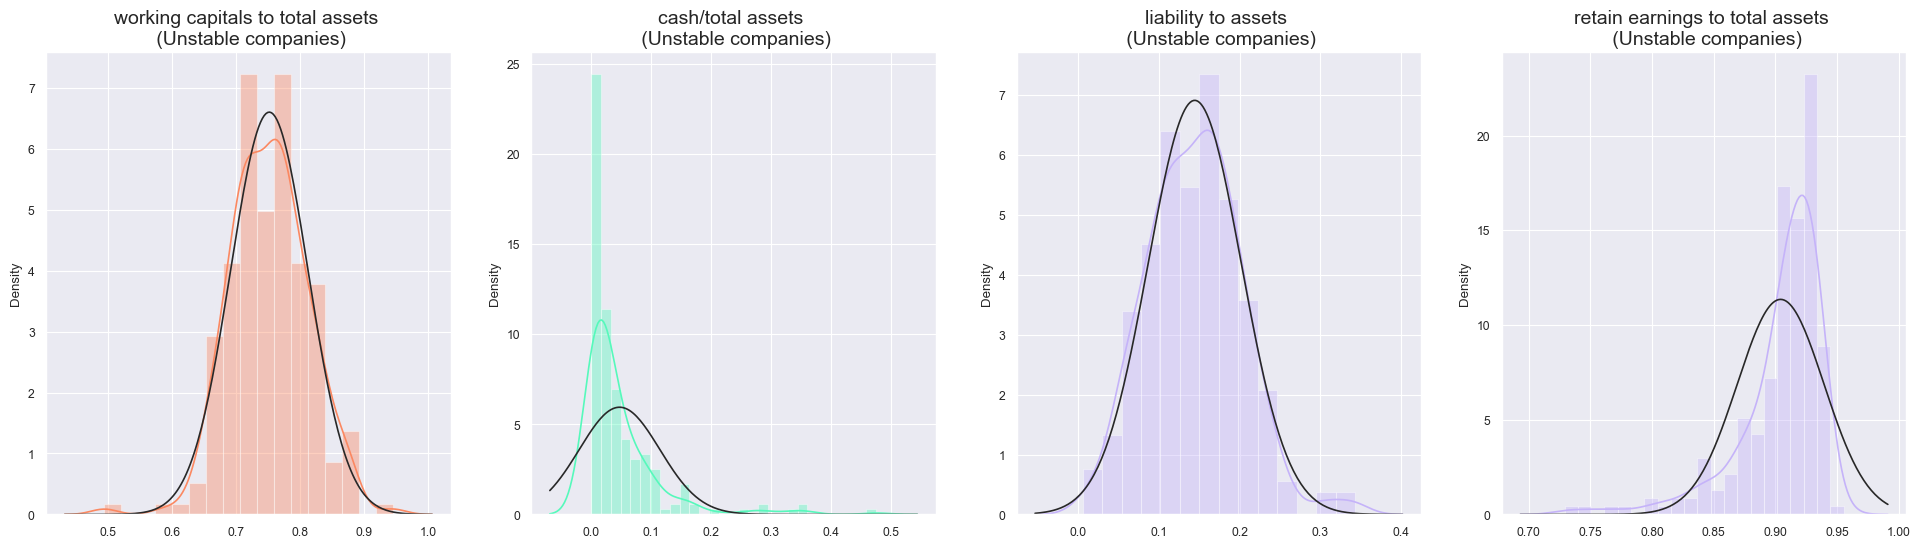

In [20]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = df[' Working Capital to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df[' Cash/Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df[' Current Liability to Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df[' Retained Earnings to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()


In [21]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset




In [22]:
for col in df:
    new_df = outliers_removal(df[col],str(col),df)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

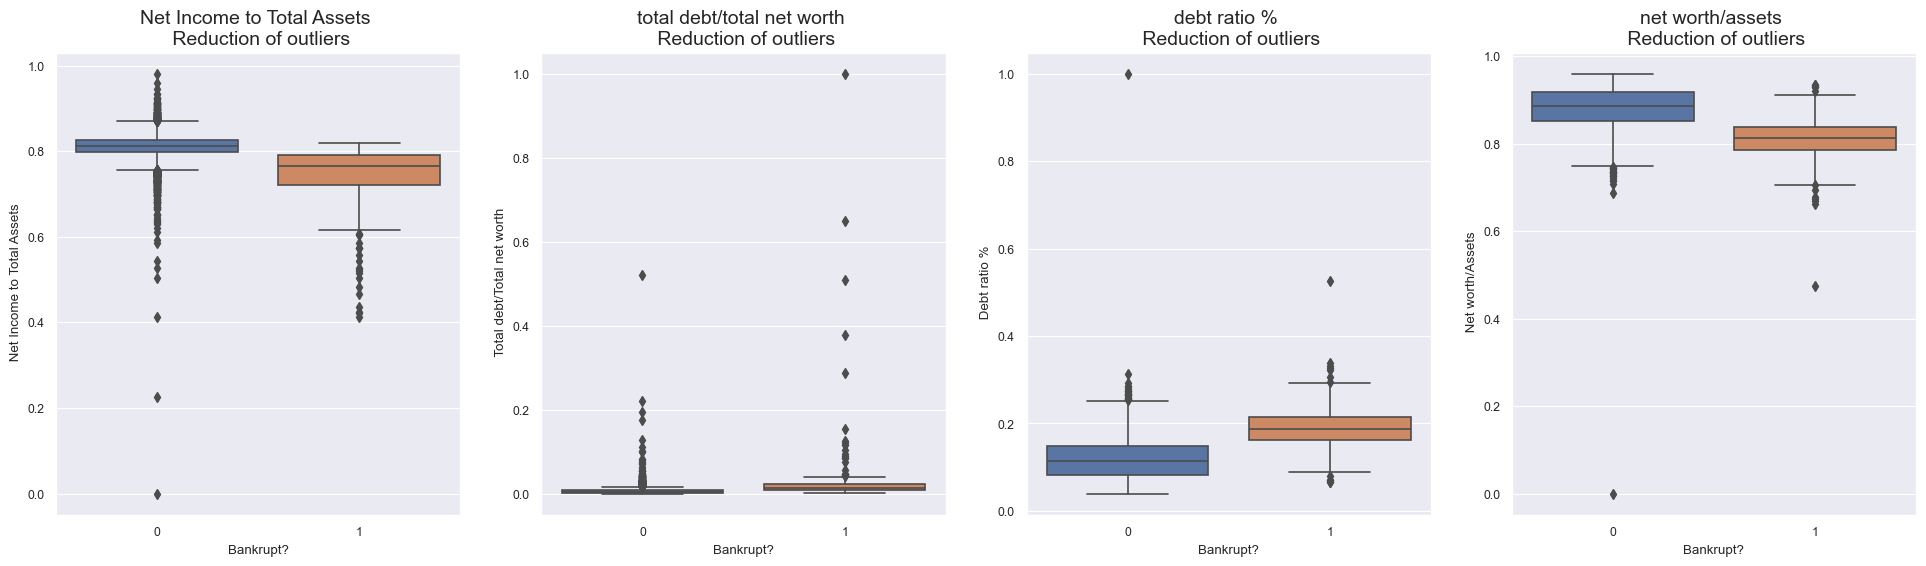

In [23]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Debt ratio %", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Net worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()


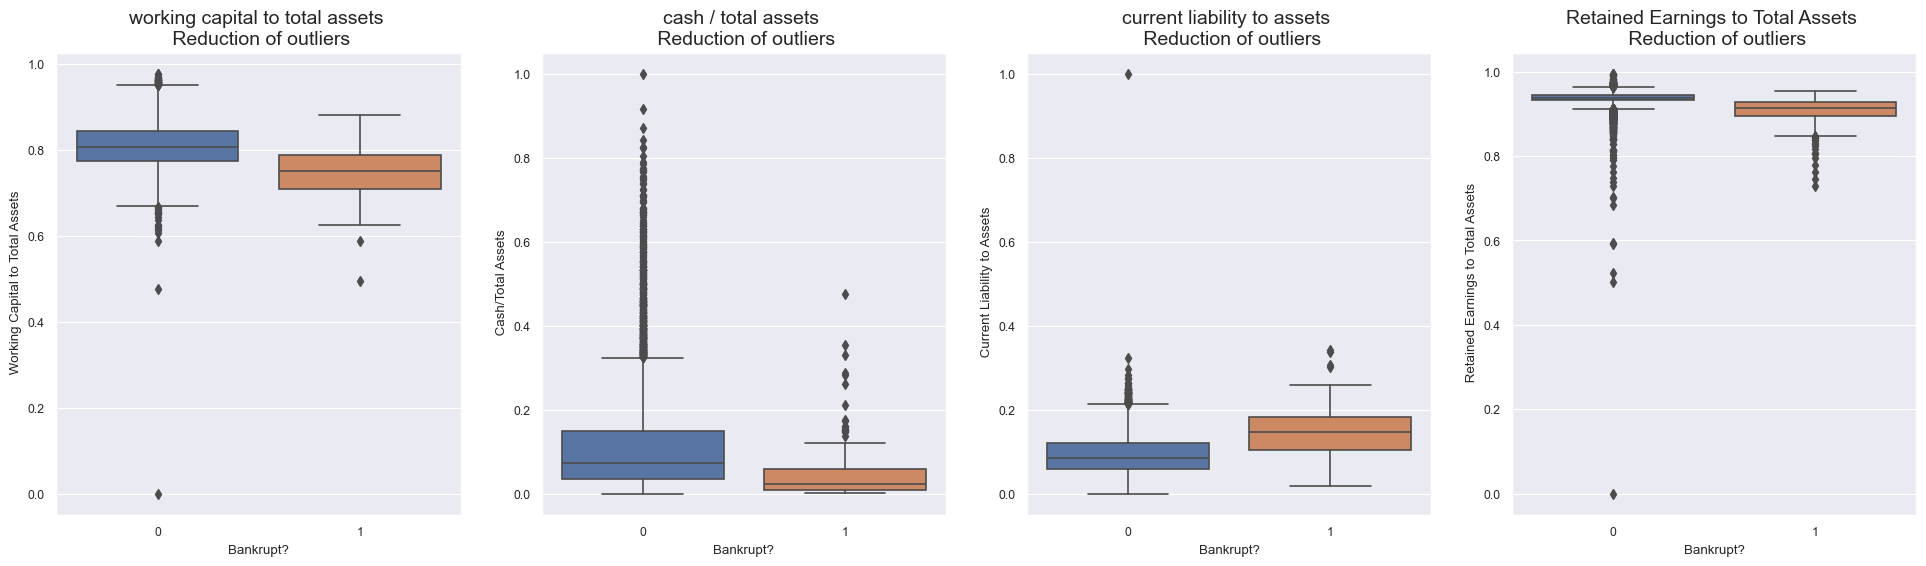

In [24]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=' Working Capital to Total Assets', data=new_df,ax=ax1) 
ax1.set_title("working capital to total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Cash/Total Assets', data=new_df,ax=ax2) 
ax2.set_title("cash / total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Current Liability to Assets', data=new_df,ax=ax3) 
ax3.set_title("current liability to assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Retained Earnings to Total Assets', data=new_df,ax=ax4) 
ax4.set_title("Retained Earnings to Total Assets \n Reduction of outliers", fontsize=14)
        
plt.show()


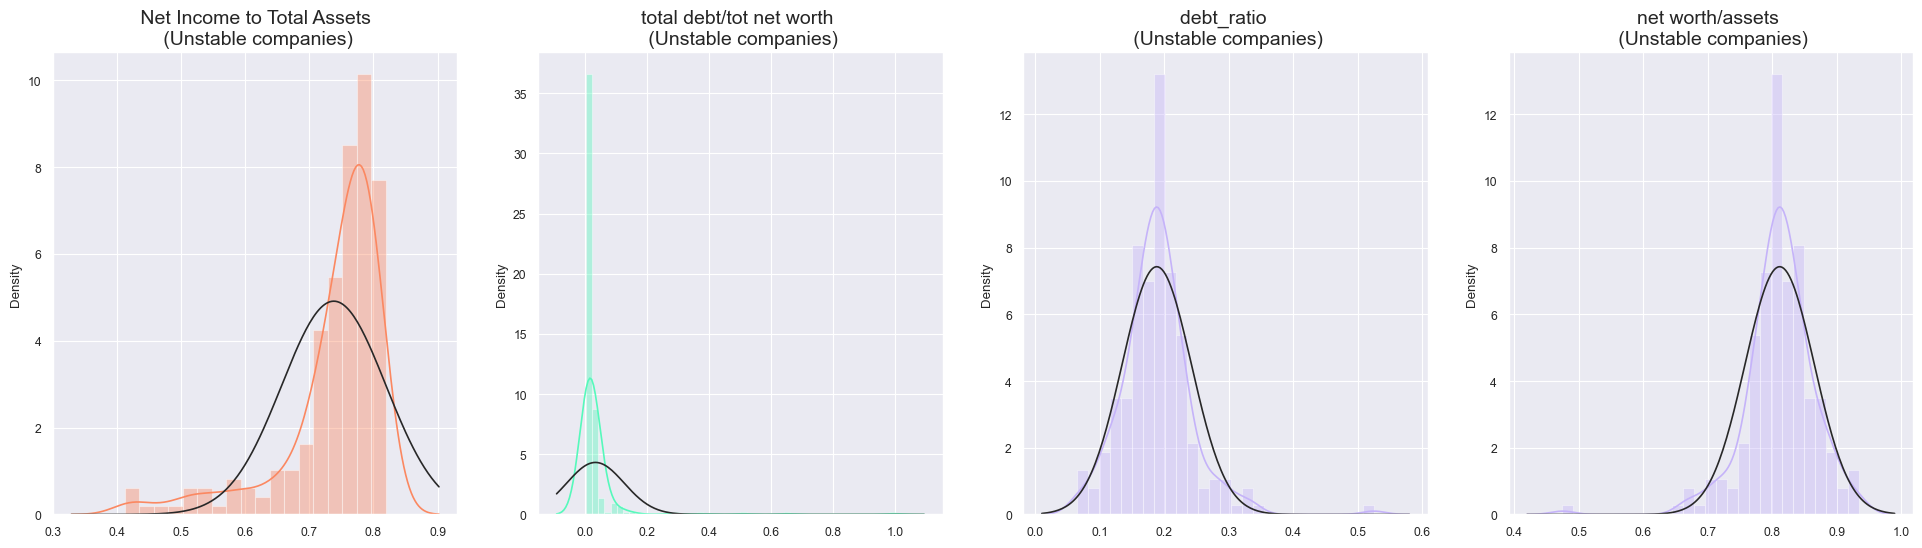

In [25]:
# Plotting the feature distributions for close to bankruptcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = new_df[' Net Income to Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = new_df[' Total debt/Total net worth'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = new_df[' Debt ratio %'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = new_df[' Net worth/Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()


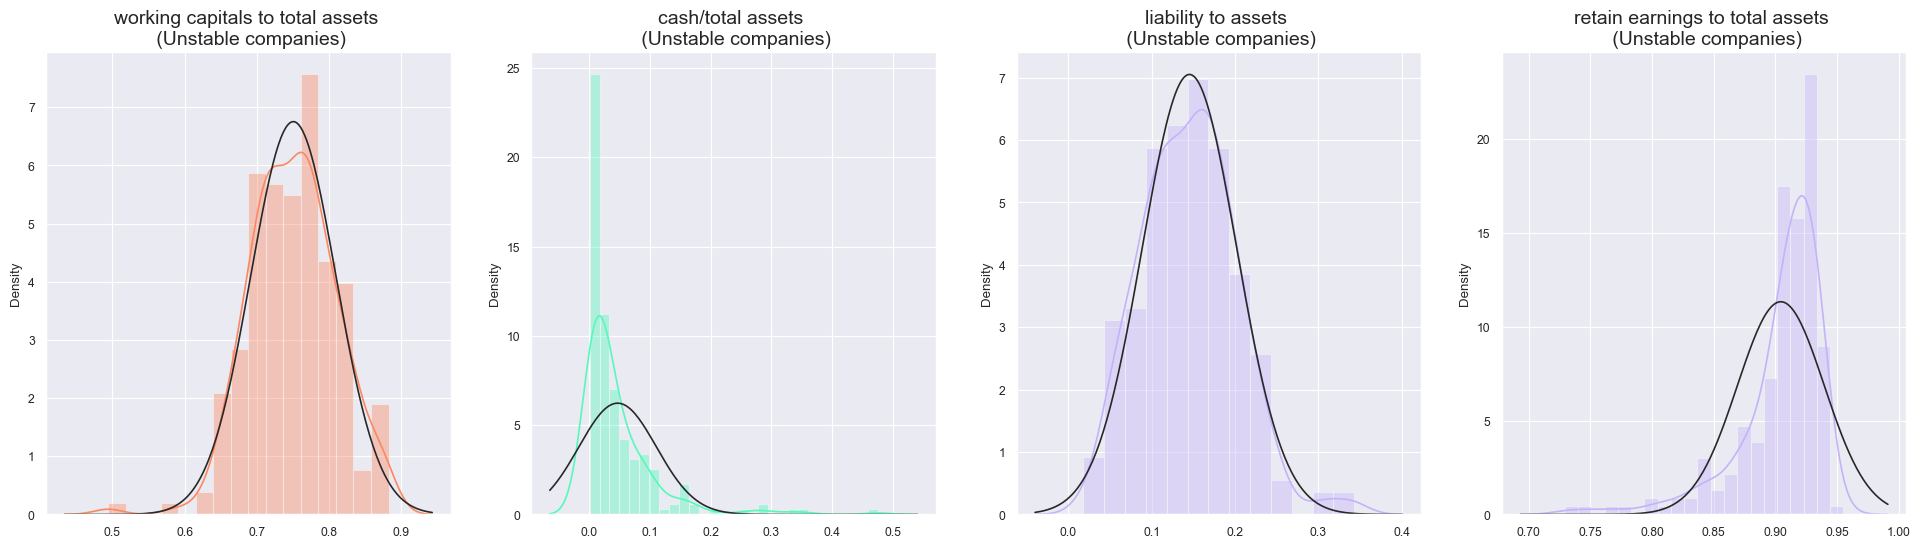

In [26]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = new_df[' Working Capital to Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = new_df[' Cash/Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = new_df[' Current Liability to Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = new_df[' Retained Earnings to Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()


In [ ]:
#What we can see is that removing the extreme outliers definitely helps to obtain more "bell shape" distributions!(At least for the features showed)

# Step 3 : Hypothesis Testing

In [54]:
from scipy.stats import chi2_contingency, ttest_ind

# Example: T-test for numerical features
significant_features = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and column != 'Bankrupt?':
        stat, p = ttest_ind(df[column][df['Bankrupt?'] == 1],
                            df[column][df['Bankrupt?'] == 0])
        if p < 0.05:
            significant_features.append(column)
            print(f'Feature: {column}, p-value: {p}')

Feature:  ROA(C) before interest and depreciation before interest, p-value: 1.9508130644944296e-106
Feature:  ROA(A) before interest and % after tax, p-value: 1.0337410169791969e-125
Feature:  ROA(B) before interest and depreciation after tax, p-value: 7.094589578357557e-117
Feature:  Operating Gross Margin, p-value: 1.2259687652210466e-16
Feature:  Realized Sales Gross Margin, p-value: 1.8594074032564058e-16
Feature:  Research and development expense rate, p-value: 0.045399294843875504
Feature:  Cash flow rate, p-value: 2.208651996518559e-09
Feature:  Tax rate (A), p-value: 1.0373466493597038e-19
Feature:  Net Value Per Share (B), p-value: 5.0581959929870665e-43
Feature:  Net Value Per Share (A), p-value: 4.685136663829345e-43
Feature:  Net Value Per Share (C), p-value: 1.0343321717234431e-42
Feature:  Persistent EPS in the Last Four Seasons, p-value: 3.201174680060968e-75
Feature:  Cash Flow Per Share, p-value: 1.4593346358806218e-10
Feature:  Operating Profit Per Share (Yuan ¥), p-v

In [ ]:
# 1.created a empty list
# 2.iterated each column and checked for datatype weather it is int or float type
# 3.performed null hypothesis on each column with respect to 'bankrupt?' column
# 4. compared p value of each column with 0.05 and columns with less than p value than 0.05 are appended in empty list
# 5. this columns which are in the list are the features that influencing bankrupcy

# Step4: Feature Engineering

In [27]:
# Dividing Data and Labels

labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'], axis = 1)

In [28]:
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

In [29]:
data_norm = log_trans(new_df)

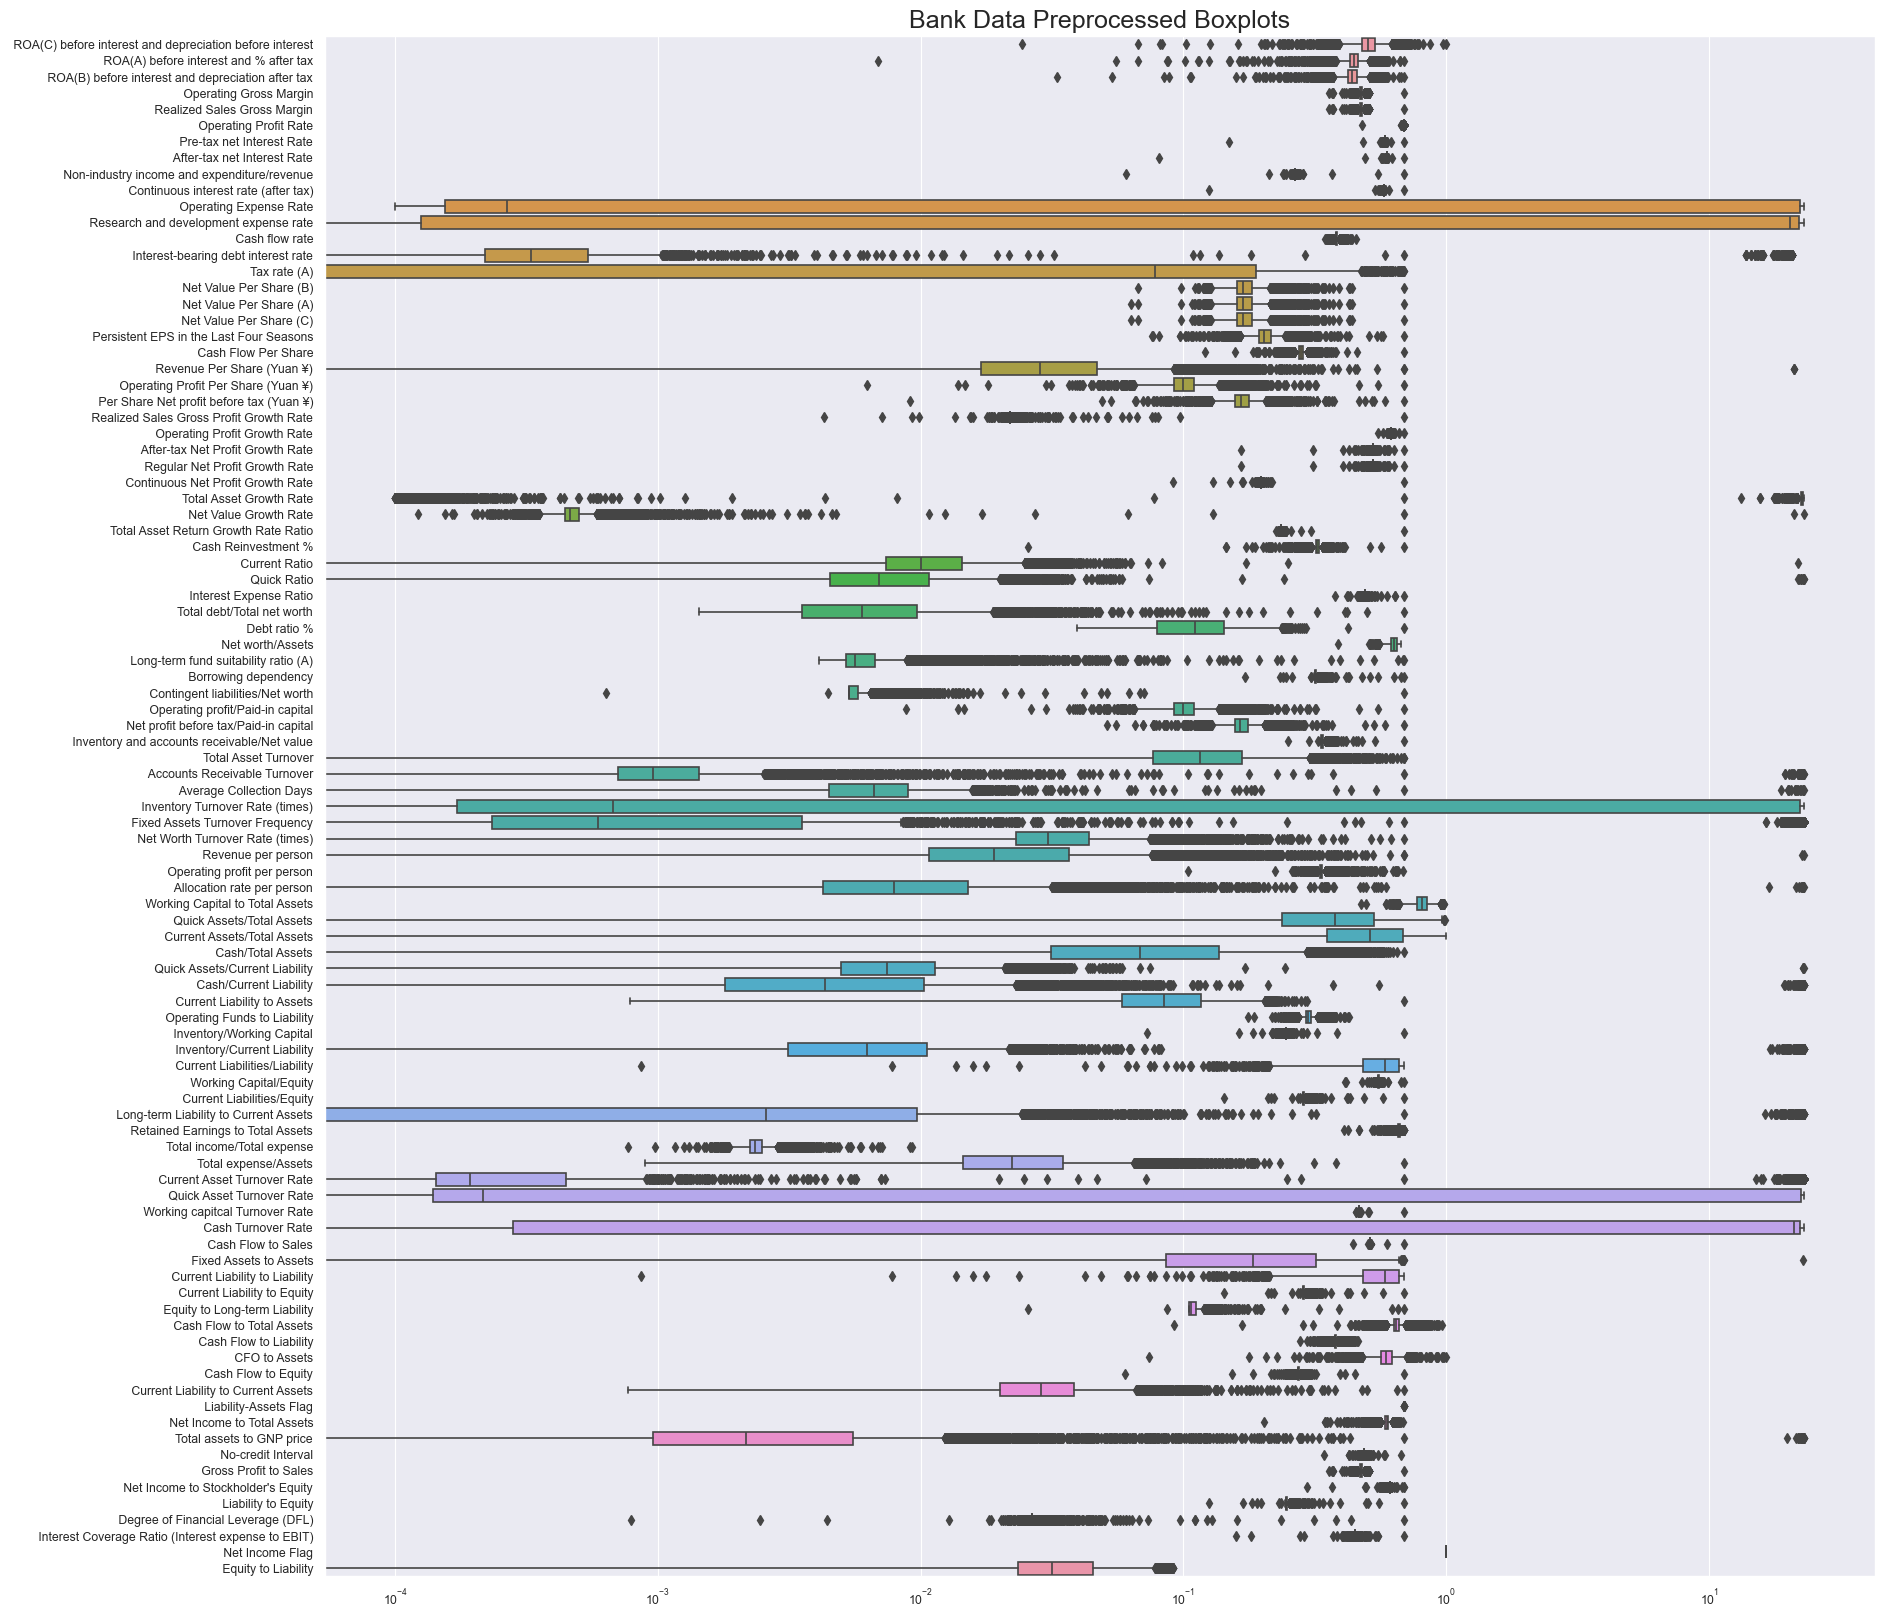

In [30]:
# Plotting Boxplots of the preprocessed numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data_norm, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

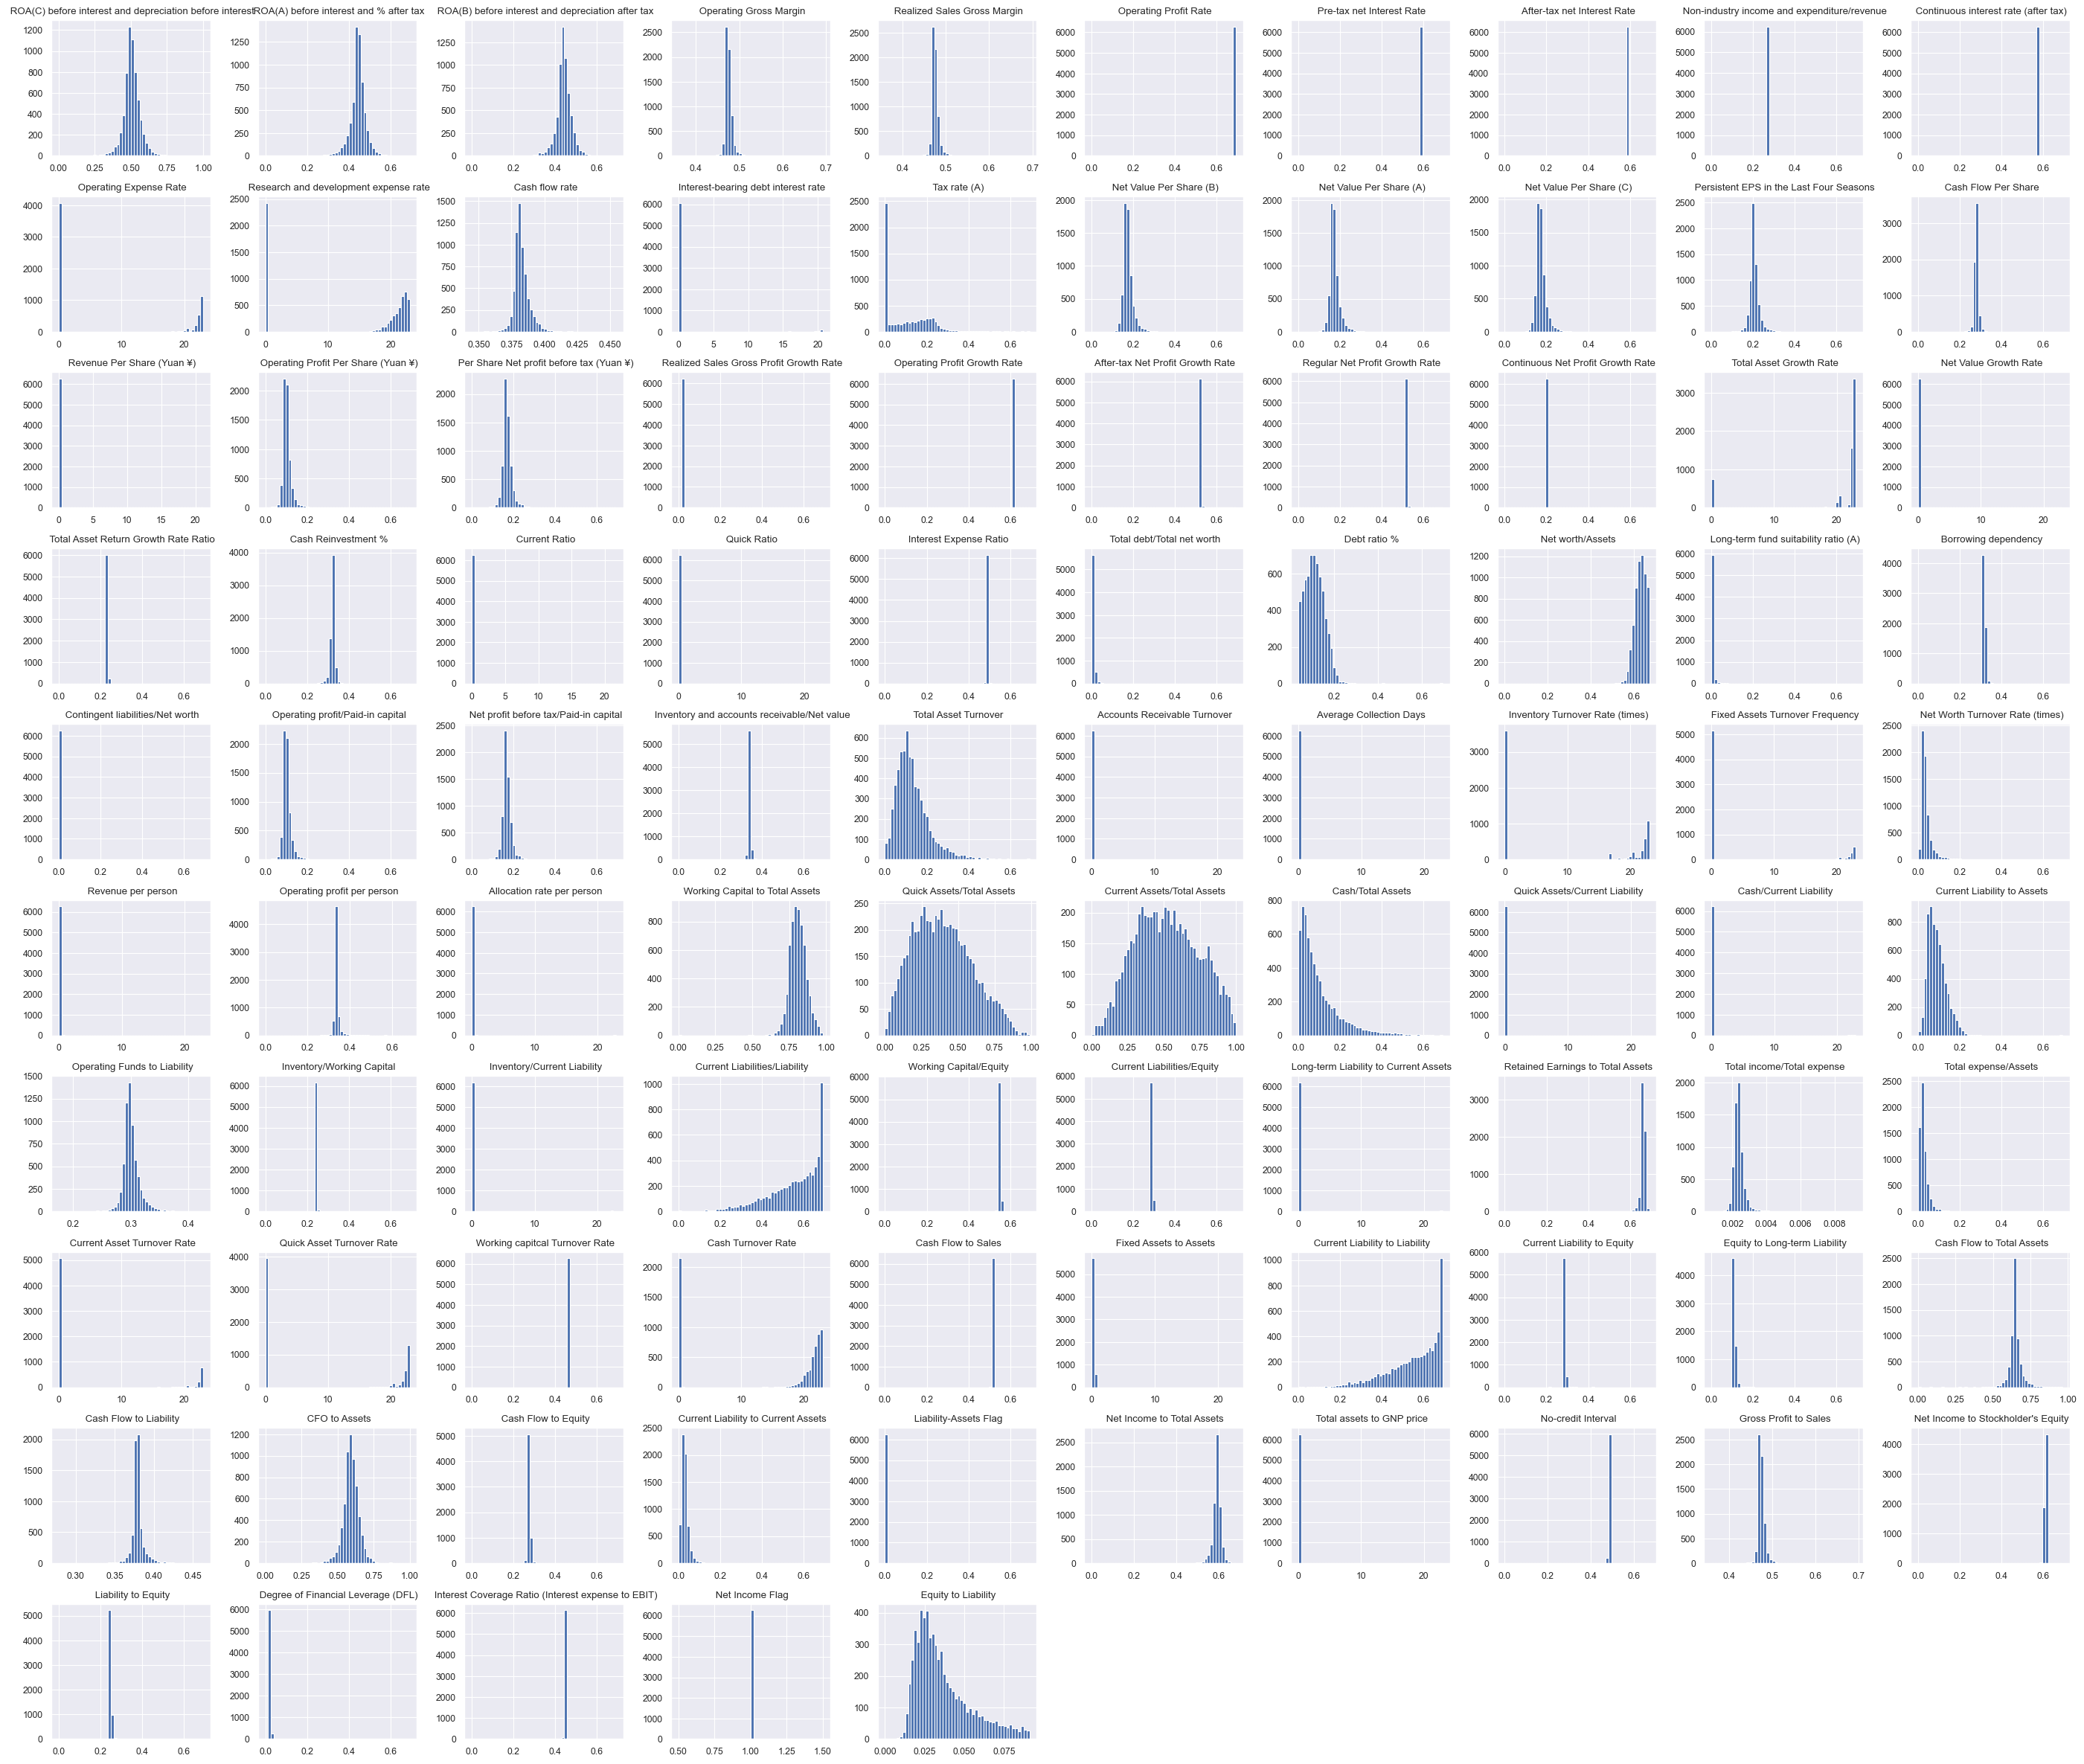

In [31]:
data_norm.hist(figsize = (35,30),bins = 50)
plt.show()

# Step 5 : Modeling

In [42]:
# Splitting Train and Test Data

X_raw,X_test,y_raw,y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.2,
                                              stratify = labels,
                                              )

In [ ]:
#I will see the performances on the cleaned undersampled data and on the SMOTE oversampled data. For this part I decided to use a few different models:

#Logistic Regression

In [43]:
# Stratified Cross Validation Splitting

sss = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in sss.split(X_raw,y_raw):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X_raw.iloc[train_index], X_raw.iloc[test_index]
    y_train_sm, y_val_sm = y_raw.iloc[train_index], y_raw.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))


Train: [ 996  997  998 ... 5013 5014 5015] Test: [   0    1    2 ... 1083 1118 1159]
Train: [   0    1    2 ... 5013 5014 5015] Test: [ 996  997  998 ... 2184 2241 2259]
Train: [   0    1    2 ... 5013 5014 5015] Test: [2000 2001 2002 ... 3007 3009 3143]
Train: [   0    1    2 ... 5013 5014 5015] Test: [3008 3010 3011 ... 4258 4268 4270]
Train: [   0    1    2 ... 4258 4268 4270] Test: [4001 4002 4003 ... 5013 5014 5015]
------------------------------------------------------------------------------------
Label Distributions: 

[0.96536257 0.03463743]
[0.96510469 0.03489531]


In [ ]:
#Logistic Regression

In [44]:
# List to append the score and then find the average

accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])
    
    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))


print('---' * 45)
print('')
print('Logistic Regression (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))
print('')
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression (SMOTE) results:

accuracy: 0.8537153380558566
precision: 0.17220901934189636
recall: 0.8267195767195767
f1: 0.28410616083118156

---------------------------------------------------------------------------------------------------------------------------------------


In [36]:
# Printing the classification report

label = ['Fin.Stable', 'Fin.Unstable']
pred_reg_sm = best_est_reg.predict(X_val_sm)
print(classification_report(y_val_sm, pred_reg_sm, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.84      0.91       968
Fin.Unstable       0.16      0.80      0.26        35

    accuracy                           0.84      1003
   macro avg       0.57      0.82      0.59      1003
weighted avg       0.96      0.84      0.89      1003



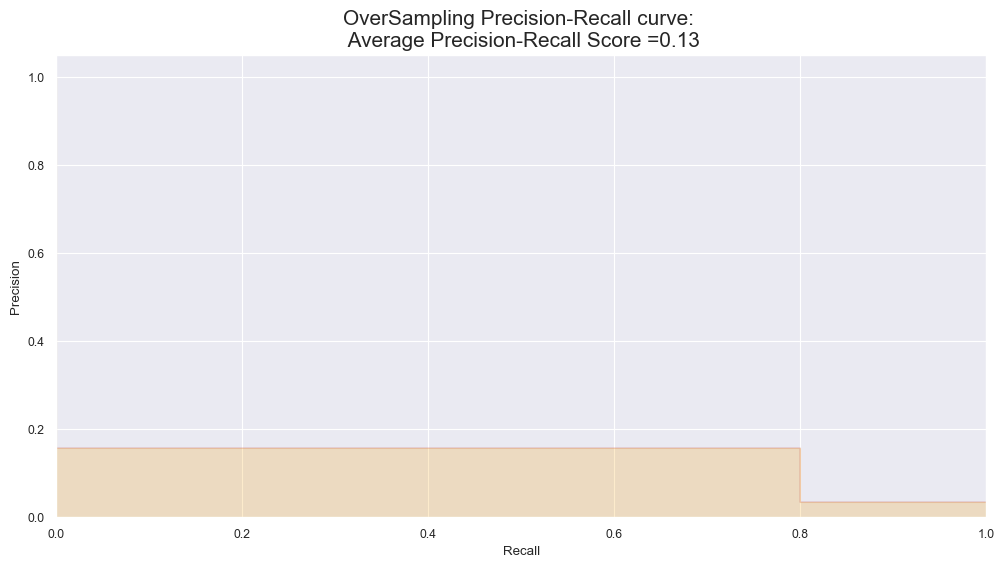

In [37]:
# Plotting Precision-Recall curve

y_score_reg = best_est_reg.predict(X_val_sm)

average_precision = average_precision_score(y_val_sm, y_score_reg)

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_val_sm, y_score_reg)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=15)

plt.show()

## Result

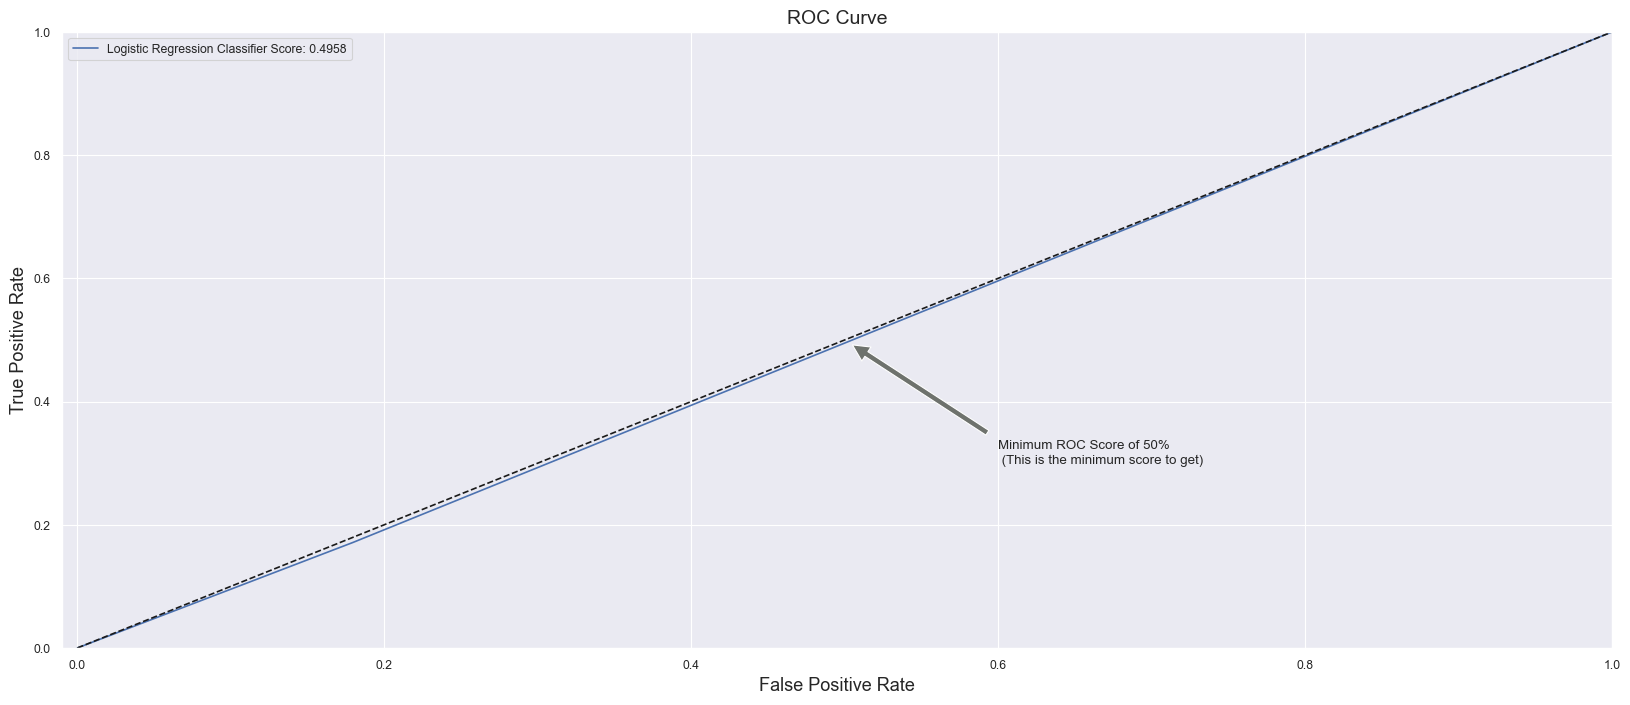

In [55]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_val_sm, pred_reg_sm)


def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, pred_reg_sm)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

<Axes: xlabel='Predicted', ylabel='Actual'>

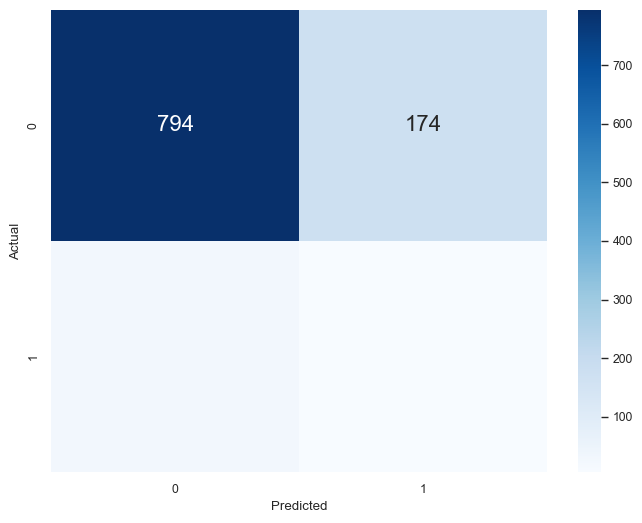

In [57]:
# Plotting confusion matrix

conf_mx0 = confusion_matrix(y_val_sm,pred_reg_sm)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

plt.figure(figsize=(8, 6))

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')


In [59]:
conf_mx0

array([[794, 174],
       [ 29,   6]], dtype=int64)

### True Positives (TP): 6
### True Negatives (TN): 794
### False Positives (FP): 174
### False Negatives (FN): 29

In [61]:
print("\nClassification Report:\n", classification_report(y_val_sm, pred_reg_sm, target_names=label))


Classification Report:
               precision    recall  f1-score   support

  Fin.Stable       0.96      0.82      0.89       968
Fin.Unstable       0.03      0.17      0.06        35

    accuracy                           0.80      1003
   macro avg       0.50      0.50      0.47      1003
weighted avg       0.93      0.80      0.86      1003



In [62]:
print("\nROC AUC Score:", roc_auc)

NameError: name 'roc_auc' is not defined

In [ ]:
# Key Observations:
# Imbalanced Classes: even after applying smote to handle imbalance data,
# The dataset is highly imbalanced with majority class (0) having 19 samples and minority class (1) having only 66 samples.

# Accuracy: The overall accuracy of the model is 0.85, which is relatively high but can be misleading due to the class imbalance.

# Precision and Recall:

# Precision (for class 1): Precision is 0.03, meaning when the model predicts bankrupt (1), it is correct only 3% of the time.
# Recall (for class 1): Recall is 0.96, indicating that the model correctly identifies 96% of the bankrupt companies.
# F1-score (for class 1): F1-score is 0.31, which balances precision and recall, providing a harmonic mean between them.